# <b><u> GRIP- The Spark Foundation</u></b>


### Data Science and Business Analyst Intership Task

### Author : Shivani  Dalvi

### Prediction using supervised ML

In [74]:
#Import Libraris
import pandas as pd
import os as os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [75]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [76]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [77]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [78]:
data.shape

(25, 2)

In [79]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Bi variate Analysis

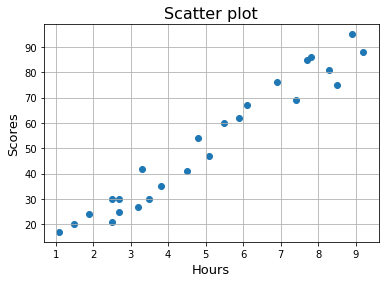

In [80]:
#SCATTER PLOT
plt.scatter(data["Hours"], data["Scores"])  
plt.xlabel("Hours", fontsize=13)
plt.ylabel("Scores", fontsize=13)
plt.title("Scatter plot", fontsize=16)
plt.grid()
plt.show()

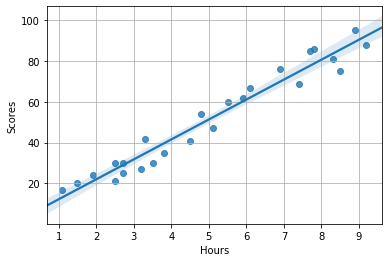

In [81]:
#Regression Line in Scatter Plot
sns.regplot(x="Hours", y="Scores", data=data)
plt.grid()
plt.show()

In [82]:
data.corr()                #Correlation of data

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Train-test-split

In [83]:
x=data[["Hours"]]
y=data[["Scores"]]

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
# Split the data for train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.8, random_state = 100)   # 70-30 Split

In [86]:
x_train.shape , y_train.shape    # Check dimension of train data 

((20, 1), (20, 1))

In [87]:
x_test.shape, y_test.shape       # Check dimension of test data

((5, 1), (5, 1))

In [88]:
# import SLR library
from sklearn.linear_model import LinearRegression

In [89]:
lr = LinearRegression()
#fit the linear model
lr = lr.fit(x_train, y_train)

In [90]:
lr.coef_   # B1

array([[9.83544438]])

In [91]:
lr.intercept_  # B0

array([1.98942311])

In [92]:
#y_hat = B0 + B1*x1
eq_y = lr.intercept_ + lr.coef_*3.7
eq_y

array([[38.38056733]])

In [93]:
x_test

,Hours
9,2.7
22,3.8
13,3.3
11,5.9
5,1.5


In [94]:
# predict the outcome of test sets
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([[28.54512294],
       [39.36411177],
       [34.44638957],
       [60.01854497],
       [16.74258969]])

## Error Evaluation

In [95]:
## Importing metrics for the evaluation of the model
from sklearn.metrics import mean_squared_error

In [103]:
mse = mean_squared_error(y_test,y_pred_lr)
print("MSE:", round(mse,2))

MSE: 20.64


In [97]:
from sklearn.metrics import r2_score

In [98]:
rsq = r2_score(y_test, y_pred_lr)    # On test data (In summary output its on train data)
print ("R Square:", round(rsq, 2))

R Square: 0.91


In [104]:
from sklearn.metrics import mean_absolute_error

In [105]:
mae=mean_absolute_error(y_test, y_pred_lr)
print("MAE:", round(mae,2))

MAE: 4.14
